In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics 
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import warnings as warn
warn.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Sr,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [3]:
Data = data.drop(["Sr"],axis=1)

In [4]:
Data.describe().T

,count,unique,top,freq
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46608,6,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42908,1857,£60 - £120 Per week,9862
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32970,477,10-09-2022,2453
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB


# Cleaning

In [6]:
data_new = Data.drop_duplicates(keep="first")
data_new.shape

(46598, 15)

In [7]:
data_new= data_new[(data_new['status']=='WON') | (data_new['status']=='LOST')]
data_new['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

In [8]:
data_new['status']=data_new['status'].map({'WON':1, 'LOST':0})
data_new['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [9]:
data_new.replace("9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0",np.NAN, inplace=True)
data_new.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


## Removing coloums with 40% missing data

In [10]:
def rmissingvaluecol(dff, threshold):
    col = []
    col = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((dff.columns.values))) - set(col)))
    return col

col=rmissingvaluecol(data_new,40)
data_new = data_new[col]
data_new.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


## Removing rows with 70% missing data

In [11]:
perc = 70
min_count = int(((100-perc)/100)*data_new.shape[1]+1)
data_new = data_new.dropna(axis=0,thresh=min_count)
data_new.shape

(46307, 14)

## Removing coloums with skewed data

In [12]:
skewed_coloumns=["des_country","lead_id"]
data_new.drop(skewed_coloumns,axis=1,inplace=True)
data_new.shape

(46307, 12)

In [13]:
data_new.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city'],
      dtype='object')

## calculating % of missing values

In [14]:
round(data_new.isnull().sum() * 100 / len(data_new), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.96
lease              5.04
movein            29.38
source            12.84
source_city       19.05
source_country    18.60
utm_source         0.13
utm_medium         6.87
des_city           5.46
dtype: float64

## Imputation

In [15]:
coloum_names=['lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city']
for col_n in coloum_names:
    values_imputed = data_new[col_n].isnull().sum()
    data_new[col_n].fillna(data_new[col_n].mode()[0],inplace=True)
    

In [16]:
data_new

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,10-09-2022,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,0,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,0,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,0,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,0,Low availability,1108,294,30-08-2022,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a9

In [17]:
def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = data_new.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = data_new[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')
    
    data_new[column_name] = data_new[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    value_counts_df = data_new[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


After :
others       

After :
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    58.909020
others                                                              26.071652
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    15.019328
Name: source_country, dtype: float64


Column Name :  utm_source
-----------------------------------------
Before :
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3    66.801995
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    10.253309
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     4.258535
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3     3.759691
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579     3.295398
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7     2.699376
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1     2.260997
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158     1.865809
44574c4ba2ea74ad4b

In [18]:
data_new= data_new.dropna()

# Data Preparation

### Dummy Variables

In [19]:
coloum_names=['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']
for col_n in coloum_names:
    dummy=pd.get_dummies(data_new[col_n])
    dummy.drop("others",axis=1,inplace=True)
    data_new=pd.concat([data_new,dummy],axis=1)
    data_new.drop(col_n,axis=1,inplace=True)
data_new.head()

,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,...,Full Year Course Stay 40 - 44 weeks,10-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1


# Train-Test Split

In [20]:
X= data_new.drop('status',axis=1) #features
y= data_new.status #target
X.head()


,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,10-09-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Corelations

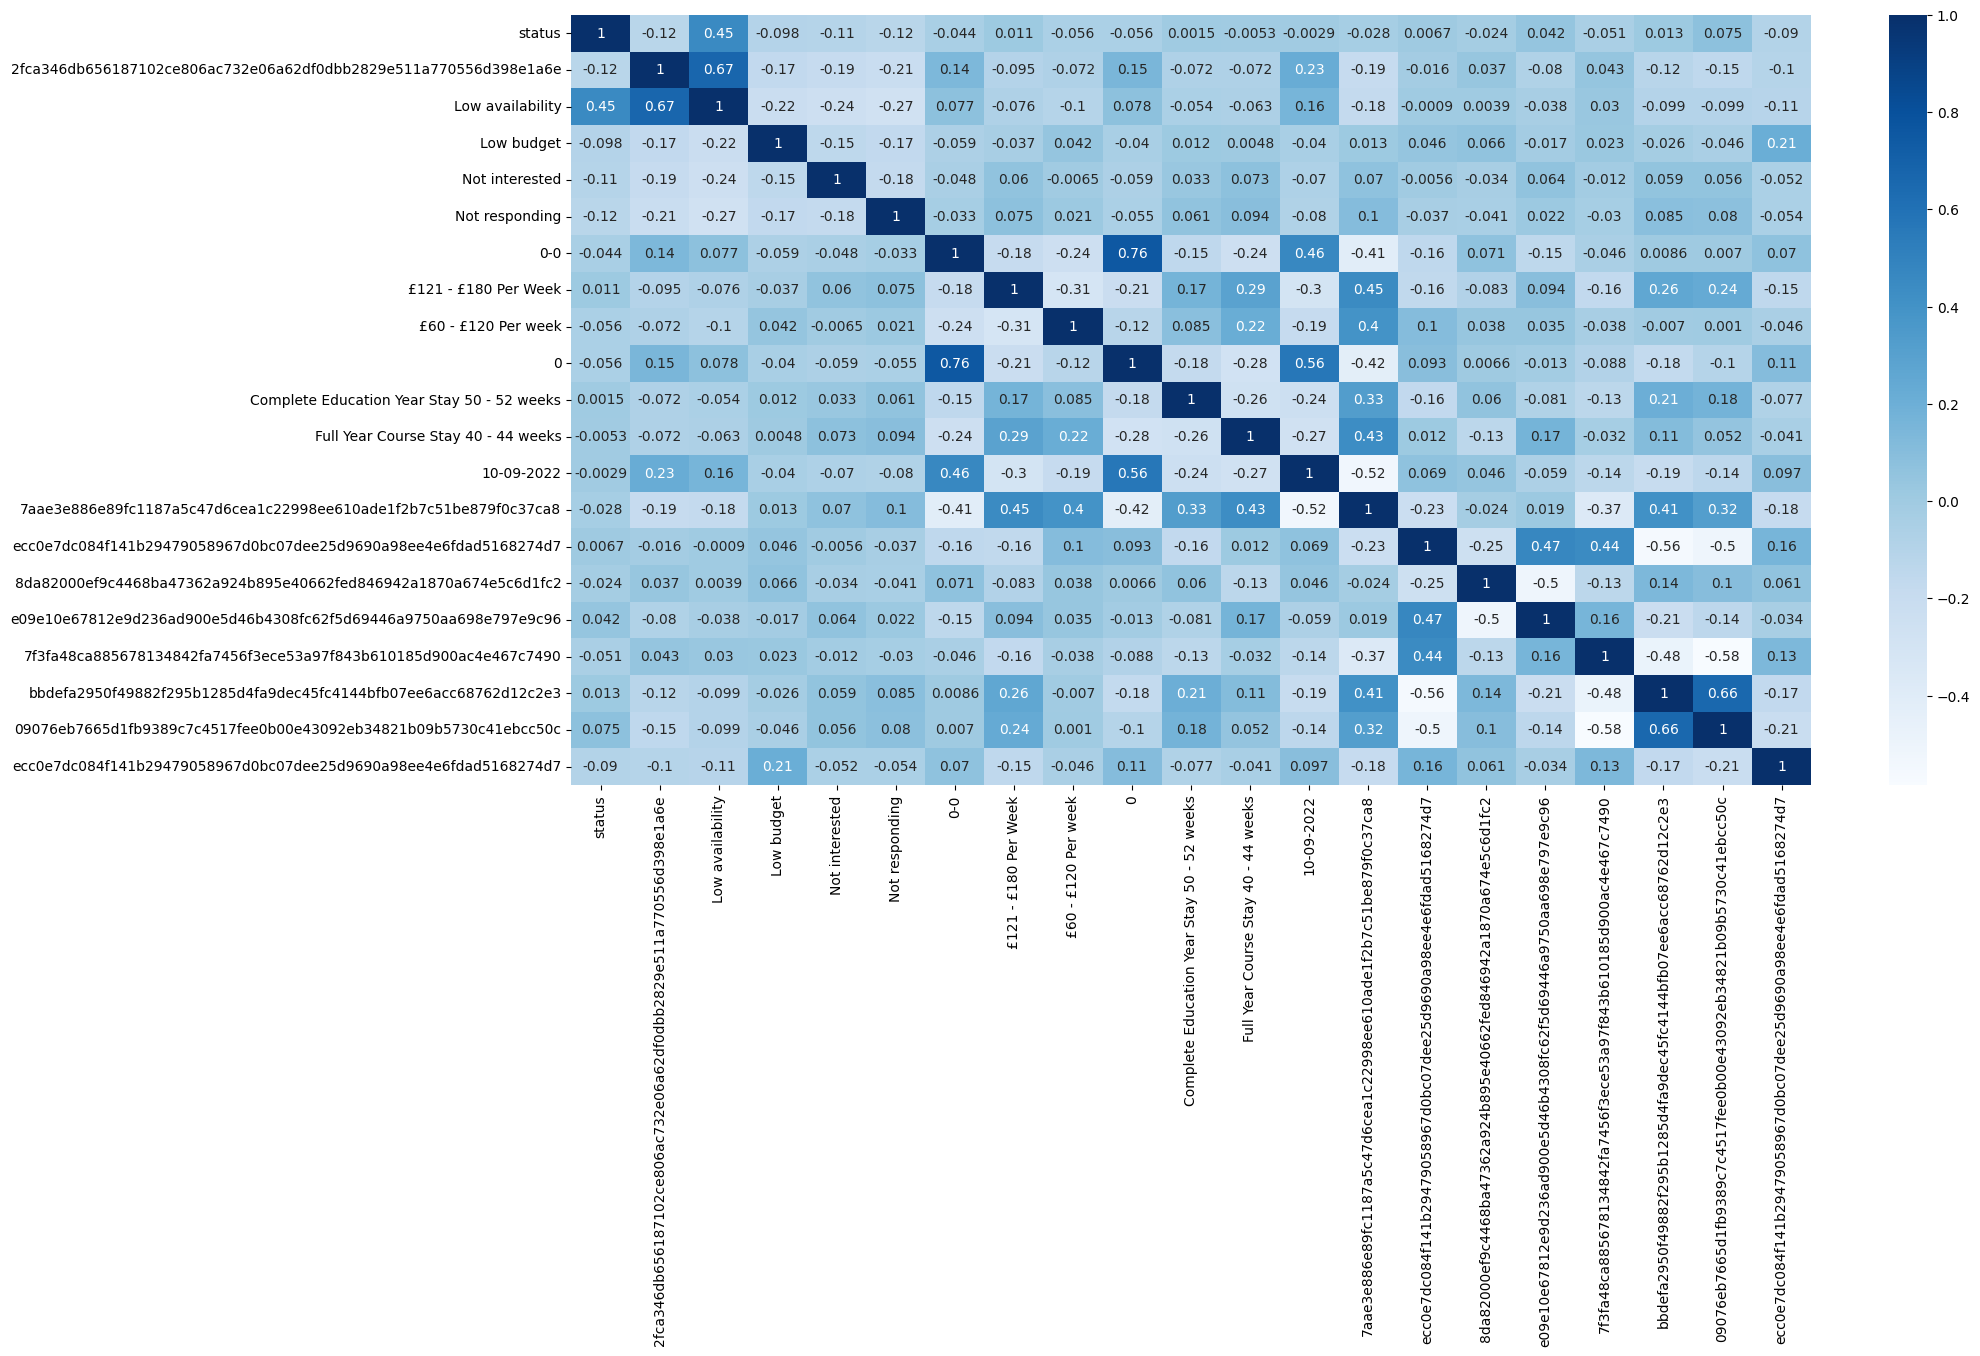

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(data_new.corr(),annot = True,cmap="Blues")
plt.show()

# Model Development

In [24]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                37045
Model:                            GLM   Df Residuals:                    37024
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1672.0
Date:                Sat, 25 Mar 2023   Deviance:                       3344.0
Time:                        23:31:16   Pearson chi2:                 3.82e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3288
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.9623   2.21e+04     -0.001      0.999   -4.33e+04    4.33e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6616   2.88e+04     -0.001      0.999   -5.65e+04    5.64e+04
Low availability                                                    31.6210   2.21e+04      0.001      0.999   -4.33e+04    4.33e+04
Low budget                                                           0.2852   4.21e+04   6.78e-06      1.000   -8.24e+04    8.24e+04
Not interested                                                      -0.3804   4.14e+04  -9.18e-06      1.000   -8.12e+04    8.12e+04
Not responding                                                      -0.3223   3.87e+04  -8.33e-06      1.000   -7.58e+04    7.58e+04
0-0                                                                 -0.6376      0.243     -2.622      0.009      -1.114      -0.161
£121 - £180 Per Week                                                 0.1360      0.161      0.843      0.399      -0.180       0.452
£60 - £120 Per week                                                 -0.1464      0.140     -1.048      0.295      -0.420       0.127
0                                                                   -0.8599      0.229     -3.750      0.000      -1.309      -0.411
Complete Education Year Stay 50 - 52 weeks                           0.0706      0.158      0.448      0.654      -0.238       0.380
Full Year Course Stay 40 - 44 weeks                                  0.1796      0.137      1.313      0.189      -0.088       0.448
10-09-2022                                                           0.2504      0.126      1.980      0.048       0.003       0.498
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.7688      0.164     -4.674      0.000      -1.091      -0.446
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.1575      0.142      1.108      0.268      -0.121       0.436
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.1137      0.142     -0.799      0.424      -0.392       0.165
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.5278      0.116      4.536      0.000       0.300       0.756
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    -0.5022      0.210     -2.391      0.017      -0.914      -0.090
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     0.2176      0.121      1.797      0.072      -0.020       0.455
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.0141      0.131      7.720      0.000       0.757       1.272
ecc0e7dc084f141b29479058

In [25]:
model = LogisticRegression()
rfe= RFE(model,step=17)
rfe=rfe.fit(X_train,y_train)
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e',
       'Low availability', 'Low budget', 'Not interested', 'Not responding',
       '0-0', '0',
       '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'],
      dtype='object')

In [27]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                37045
Model:                            GLM   Df Residuals:                    37033
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1701.9
Date:                Sat, 25 Mar 2023   Deviance:                       3403.8
Time:                        23:31:17   Pearson chi2:                 3.82e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3277
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.7265   2.22e+04     -0.001      0.999   -4.36e+04    4.35e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6147    2.9e+04     -0.001      0.999   -5.69e+04    5.68e+04
Low availability                                                    31.6102   2.22e+04      0.001      0.999   -4.35e+04    4.36e+04
Low budget                                                           0.2647   4.23e+04   6.26e-06      1.000   -8.29e+04    8.29e+04
Not interested                                                      -0.2897   4.17e+04  -6.95e-06      1.000   -8.17e+04    8.17e+04
Not responding                                                      -0.2566   3.89e+04  -6.59e-06      1.000   -7.63e+04    7.63e+04
0-0                                                                 -0.7443      0.233     -3.201      0.001      -1.200      -0.288
0                                                                   -0.6074      0.204     -2.984      0.003      -1.006      -0.208
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.6495      0.106     -6.148      0.000      -0.857      -0.442
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.2678      0.113     11.199      0.000       1.046       1.490
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.2857      0.115      2.485      0.013       0.060       0.511
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -2.8536      0.103    -27.673      0.000      -3.056      -2.652
====================================================================================================================================
"""

In [28]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([3.21951340e-14, 2.68537904e-15, 8.17856466e-01, 1.60056227e-13,
       6.02195541e-14, 4.50498646e-14, 4.65926159e-14, 2.38741491e-15,
       8.39749201e-14, 6.28563215e-14])

In [29]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,3.219513e-14,31150
1,0,2.685379e-15,8771
2,1,8.178565e-01,10005
3,0,1.600562e-13,2330
4,0,6.021955e-14,1304


In [30]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,3.219513e-14,31150,0
1,0,2.685379e-15,8771,0
2,1,8.178565e-01,10005,1
3,0,1.600562e-13,2330,0
4,0,6.021955e-14,1304,0


In [31]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score
0,0,3.219513e-14,31150,0,0
1,0,2.685379e-15,8771,0,0
2,1,8.178565e-01,10005,1,82
3,0,1.600562e-13,2330,0,0
4,0,6.021955e-14,1304,0,0


In [32]:
y_train_pred_final['Lead_Score'].value_counts()

0     33282
82     1184
90      535
92      301
16      208
21      205
86      179
69      174
76      141
33      121
71       93
12       91
9        73
11       64
26       53
40       49
3        48
39       42
56       41
63       35
64       33
7        17
5        15
80       14
75       12
53       12
15       11
48        6
19        4
57        1
60        1
Name: Lead_Score, dtype: int64

# Prediction

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_prob = model.predict_proba(X_test)
y_prob

array([[9.99949142e-01, 5.08582267e-05],
       [9.99914279e-01, 8.57212388e-05],
       [9.99881663e-01, 1.18337139e-04],
       ...,
       [9.99917028e-01, 8.29715065e-05],
       [9.99985528e-01, 1.44720829e-05],
       [9.99052373e-01, 9.47627215e-04]])

# Confusion matrix

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [37]:
cnf_matrix

array([[8538,  115],
       [  56,  553]], dtype=int64)

# Prediction 2

In [38]:
X_test = X_test[col]
X_test.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
42116,1,1,0,0,0,0,0,1,0,1,1
18517,0,0,0,0,1,1,1,0,1,0,0
17619,0,0,0,0,1,0,0,0,0,0,0
44334,0,0,1,0,0,0,1,1,0,1,0
16597,0,0,0,0,0,0,0,1,1,0,0


In [39]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

42116    1.804515e-15
18517    3.219513e-14
17619    3.501421e-14
44334    2.232492e-14
16597    8.397492e-14
3849     2.362028e-15
21111    6.285632e-14
30357    3.850871e-01
22706    1.402527e-15
6747     8.397492e-14
dtype: float64

In [40]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
42116,1.804515e-15
18517,3.219513e-14
17619,3.501421e-14
44334,2.232492e-14
16597,8.397492e-14


In [41]:

y_test_df = pd.DataFrame(y_test)

y_test_df['LeadId'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,status,LeadId,0
0,0,42116,1.804515e-15
1,0,18517,3.219513e-14
2,0,17619,3.501421e-14
3,0,44334,2.232492e-14
4,0,16597,8.397492e-14


In [42]:
y_pred_final['status'].value_counts()

0    8653
1     609
Name: status, dtype: int64

In [43]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','status','Converted_Prob'], axis=1)

y_pred_final.head()

,LeadId,status,Converted_Prob
0,42116,0,1.804515e-15
1,18517,0,3.219513e-14
2,17619,0,3.501421e-14
3,44334,0,2.232492e-14
4,16597,0,8.397492e-14


In [44]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,LeadId,status,Converted_Prob,final_predicted,Lead_Score
0,42116,0,1.804515e-15,0,0
1,18517,0,3.219513e-14,0,0
2,17619,0,3.501421e-14,0,0
3,44334,0,2.232492e-14,0,0
4,16597,0,8.397492e-14,0,0


# Conclusion

In [45]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precesion: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))

Accuracy:  0.9815374649103865
Precesion:  0.8278443113772455
Recall:  0.9080459770114943
